In [4]:
import os
import librosa
import numpy as np
import scipy.io.wavfile as wav
import librosa.display
import matplotlib.pyplot as plt

In [3]:
DATASET_PATH = r"D:/FYP/Datasets/Paper sourced"
CALIBRATION_FILE = os.path.join(DATASET_PATH, "Calibration", "Calibration.wav")  
OUTPUT_PATH = "D:/FYP/Datasets/Paper sourced/mfcc_features"

# Ensure the output folder exists
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Function to apply calibration correction
def calibrate_audio(audio_signal):
    """Applies calibration correction by dividing the signal by 20."""
    return audio_signal / 20  # Convert back to correct µPa values

In [4]:
# Function to extract MFCCs
def extract_mfcc(file_path, sr=48000, n_mfcc=13, max_pad_len=100):
    """Extracts MFCCs after applying calibration correction."""
    
    # Load the audio file using SciPy (ensures correct scaling)
    sample_rate, signal = wav.read(file_path)
    
    # Apply calibration correction
    signal = calibrate_audio(signal.astype(np.float32))

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)

    # Normalize feature length (pad/truncate)
    if mfccs.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs

In [ ]:
# Process all drones
for drone_folder in ["SegmentedAudio_HolybroS500", "SegmentedAudio_Matrice", 
                     "SegmentedAudio_Mavic", "SegmentedAudio_TarotX6_B1", "SegmentedAudio_TarotX6_B2","noise"]:
    
    folder_path = os.path.join(DATASET_PATH, drone_folder)
    drone_output_path = os.path.join(OUTPUT_PATH, drone_folder)
    os.makedirs(drone_output_path, exist_ok=True)

    print(f"Processing: {drone_folder}")

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder_path, file_name)

            # Extract MFCCs
            mfcc_features = extract_mfcc(file_path)

            # Save as numpy file
            np.save(os.path.join(drone_output_path, file_name.replace(".wav", ".npy")), mfcc_features)

print("MFCC extraction completed. Features saved in:", OUTPUT_PATH)

Processing: SegmentedAudio_HolybroS500
Processing: SegmentedAudio_Matrice
Processing: SegmentedAudio_Mavic
Processing: SegmentedAudio_TarotX6_B1
Processing: SegmentedAudio_TarotX6_B2
MFCC extraction completed. Features saved in: D:/FYP/Datasets/Paper sourced/mfcc_features


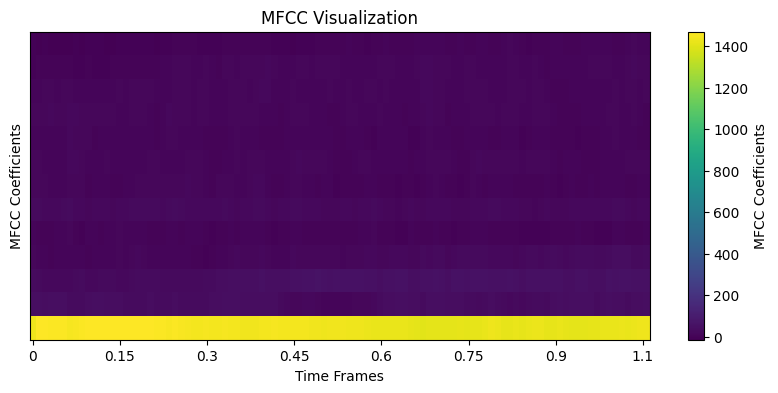

In [6]:
sample_mfcc_path = "D:/FYP/Datasets/Paper sourced/mfcc_features/SegmentedAudio_Mavic/DJIMavic2Enterprise_Ascent_1.npy"  # Update with actual path
mfcc = np.load(sample_mfcc_path)

# Plot the MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis="time", sr=48000, cmap="viridis")
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCC Visualization")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.show()